# 2. Compute the popcount function for n(large number of inputs) qubits
Compute the popcount function for n = 15 qubits. 
<h3>
$$|x,0,0\rangle \mapsto e^{i\theta(x)}|x,\text{Popcount}(x),0\rangle$$

## a) Circuit for n = 15 Popcount function

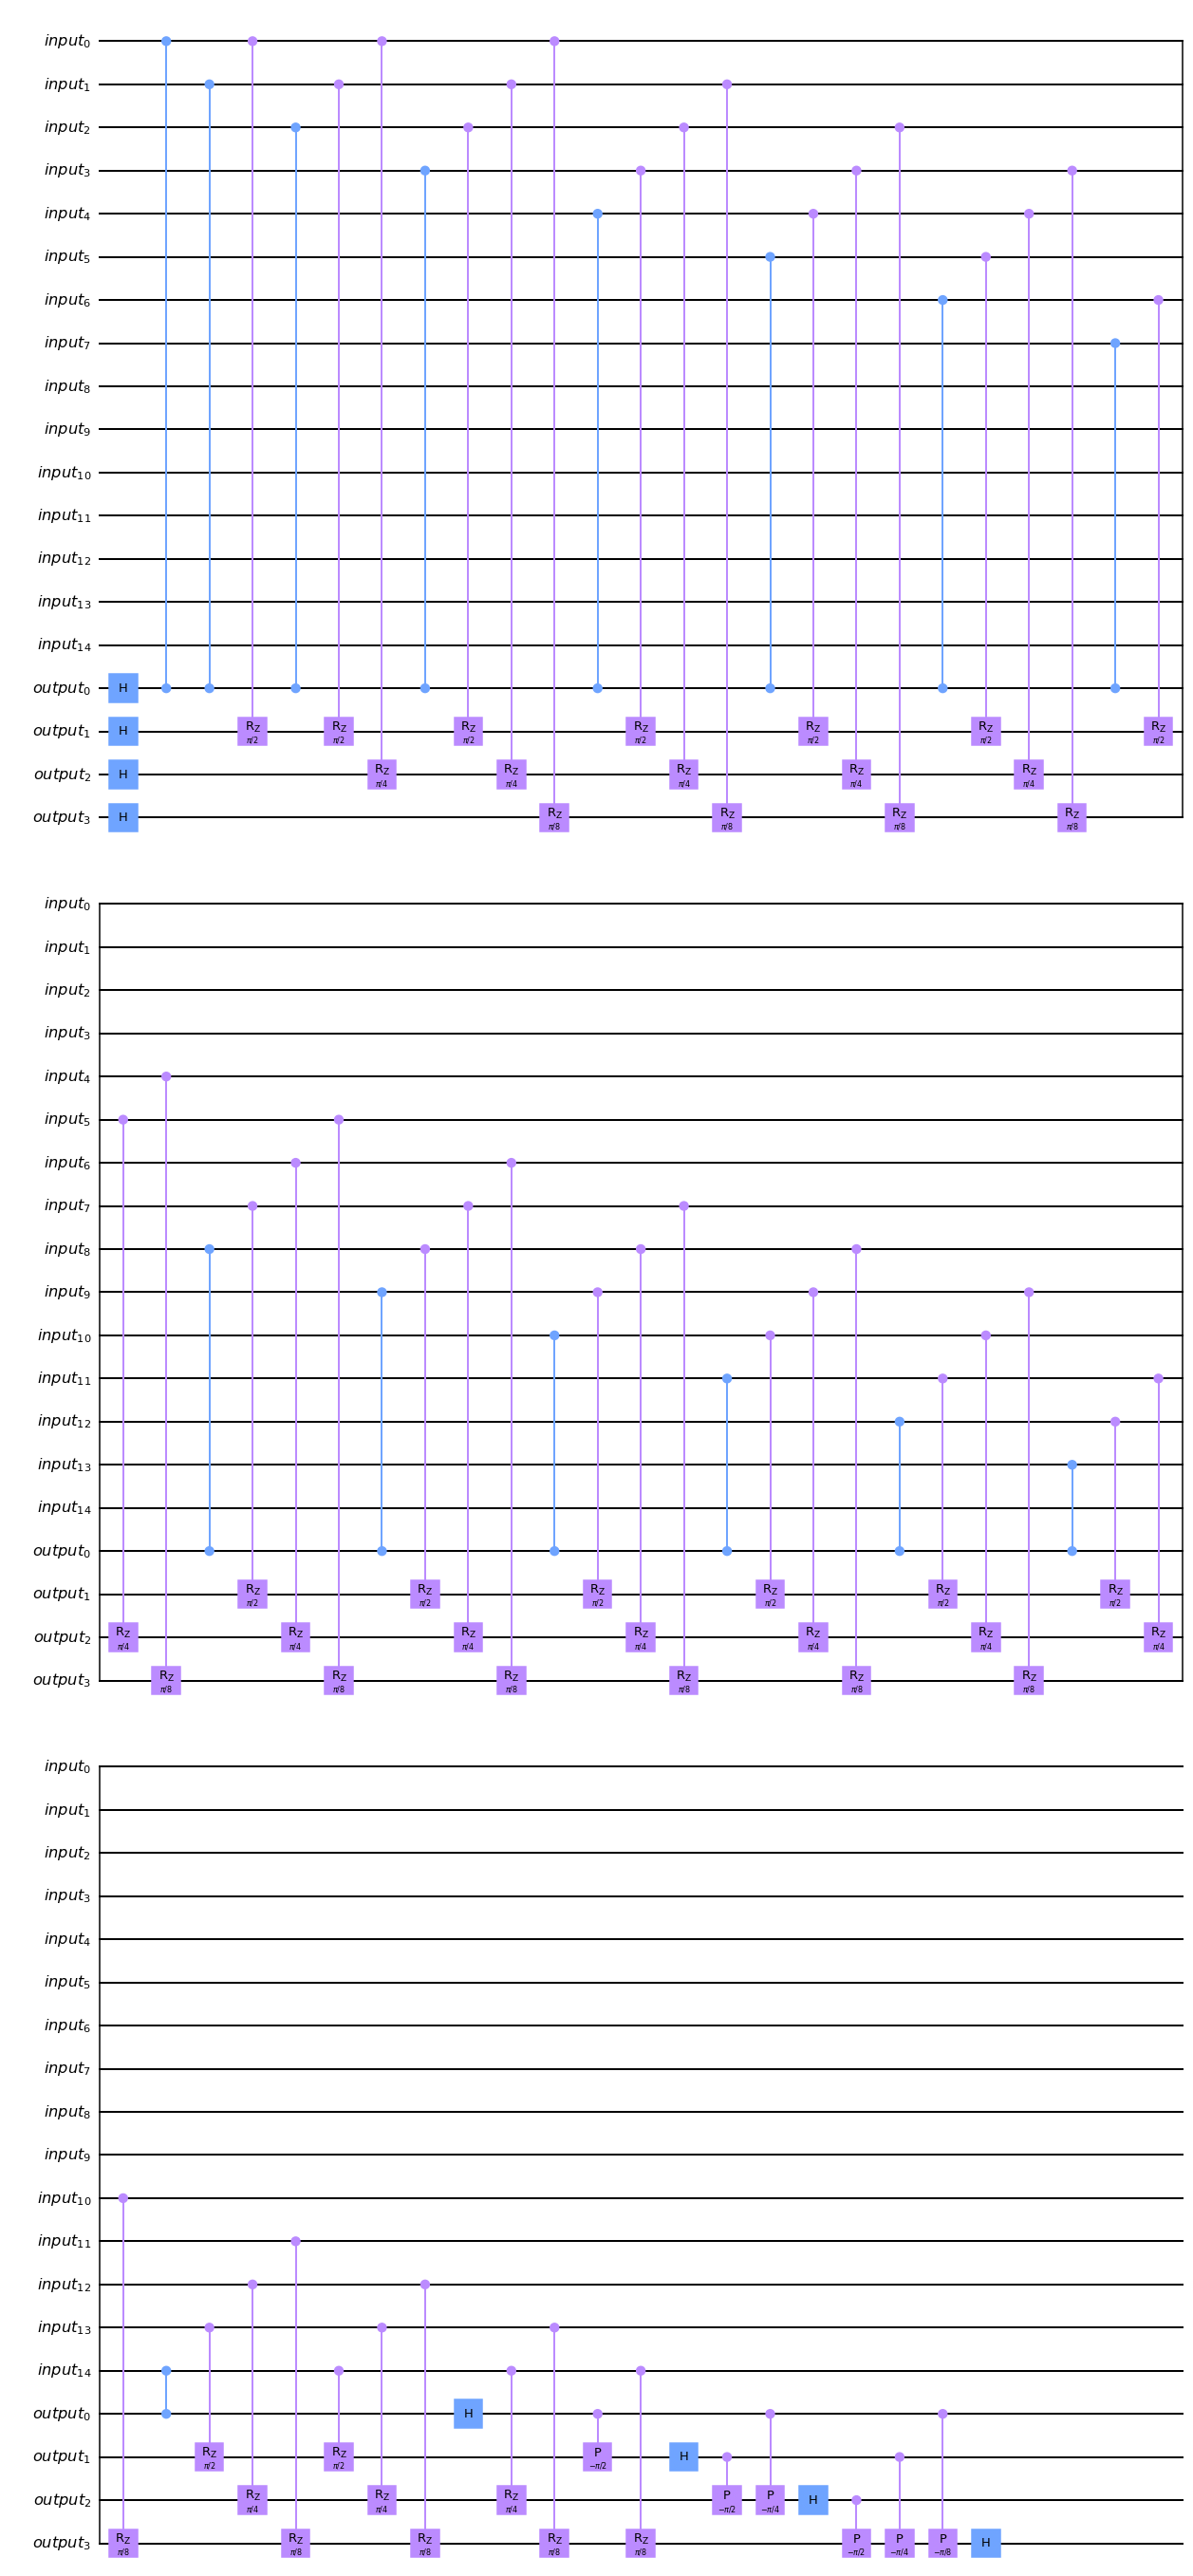

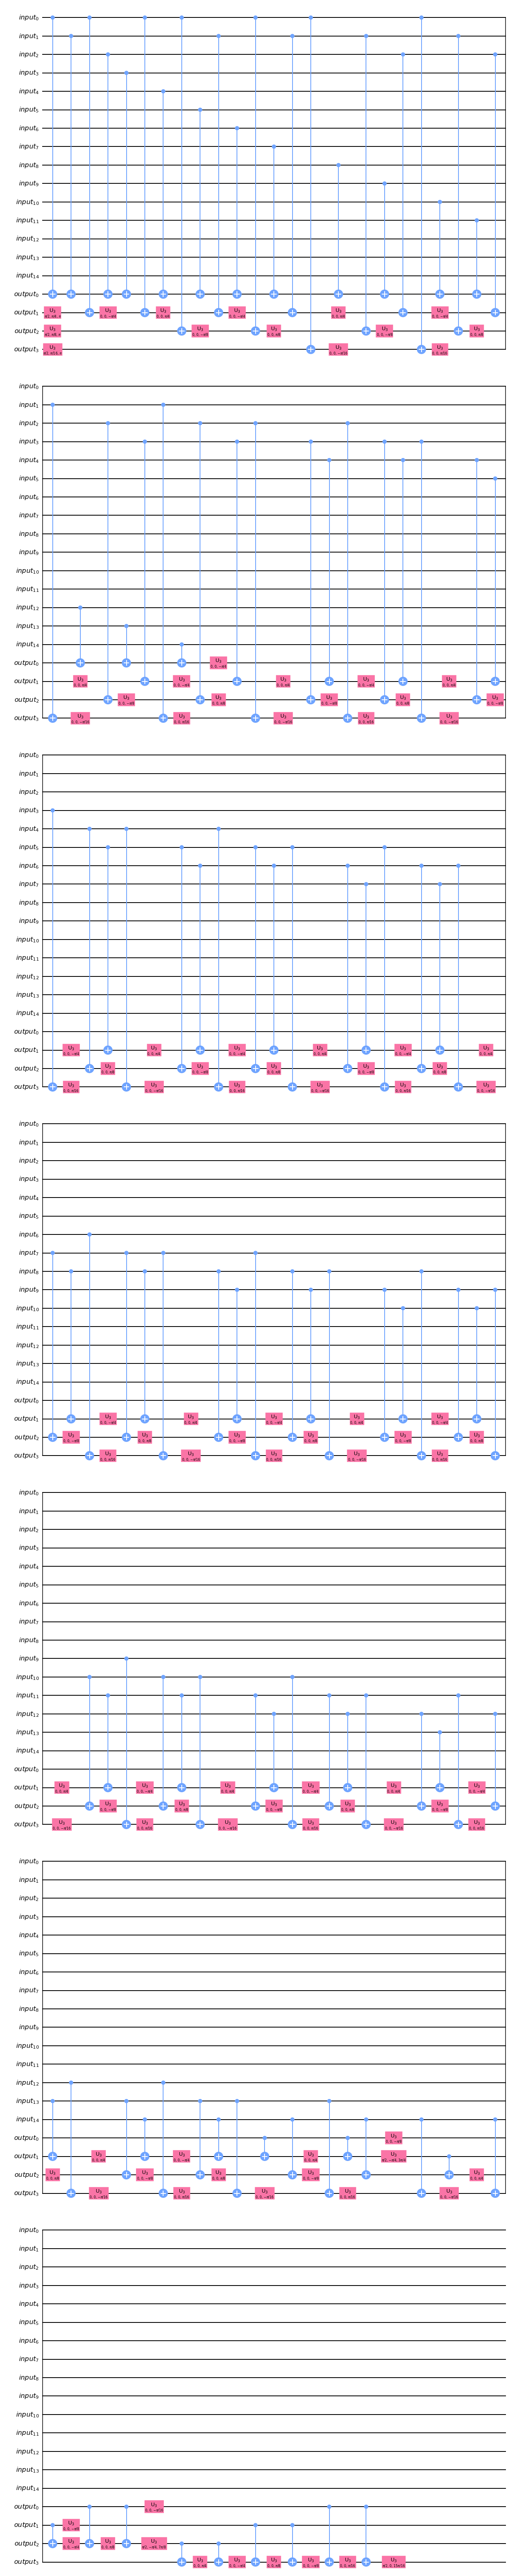

84


In [35]:
# Importing the qiskit module
from qiskit import *
from qiskit.circuit.library import QFT
import math
pi = math.pi

# Defining input, output and scratch qubits
x15 = 15   # number of input qubits
y15 =  4  # number of output qubit 
s15 =  0 # number of scratch qubit

def crz(Circ, angle, control, target):
    Circ.rz(angle/2, control)
    Circ.rz(angle/2, target)
    Circ.cx(control, target)
    Circ.rz(-angle/2, target)
    Circ.cx(control, target)

# Defining Quantum Circuit with the given circuits
def Circuit_15(In,Ou,Sc):
    if Sc != 0:
        # initiating required qubits
        X = QuantumRegister(In, 'input') 
        Y= QuantumRegister(Ou, 'output') 
        S = QuantumRegister(Sc, 'scratch')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(X,Y,S)
    else:
        
        # initiating required qubits
        X = QuantumRegister(In, 'input') 
        Y= QuantumRegister(Ou, 'output') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(X,Y)
    
    ##### Create you circuit below #########
    for i in range(4):
        Circ.h(Y[i])
        
    for qubit in range(15):
        Circ.cz(X[qubit], Y[0])
    
    for output in [1,2,3]:        
        for qubit in X:
            #crz(Circ, pi/2**(output), qubit, Y[output])
            Circ.crz(pi/2**(output), qubit, Y[output])
    
    #Inverse QFT
    Circ.h(Y[0])
    
    Circ.cp(-pi/2, Y[0], Y[1])
    Circ.h(Y[1])
    
    Circ.cp(-pi/2, Y[1], Y[2])
    Circ.cp(-pi/4, Y[0], Y[2])
    Circ.h(Y[2])
    
    Circ.cp(-pi/2, Y[2], Y[3])
    Circ.cp(-pi/4, Y[1], Y[3])
    Circ.cp(-pi/8, Y[0], Y[3])
    Circ.h(Y[3])
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    display(Circ.draw('mpl'))
    print(Circ.depth())
    
    return Circ

qc_2a = Circuit_15(x15,y15,s15)

### Grader

In [36]:
from qc_grader import grade_ex2a

grade_ex2a(qc_2a)

Grading your answer for ex2/partA. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 160.
Feel free to submit your answer.



## b) Circuit for n = 16 Popcount function

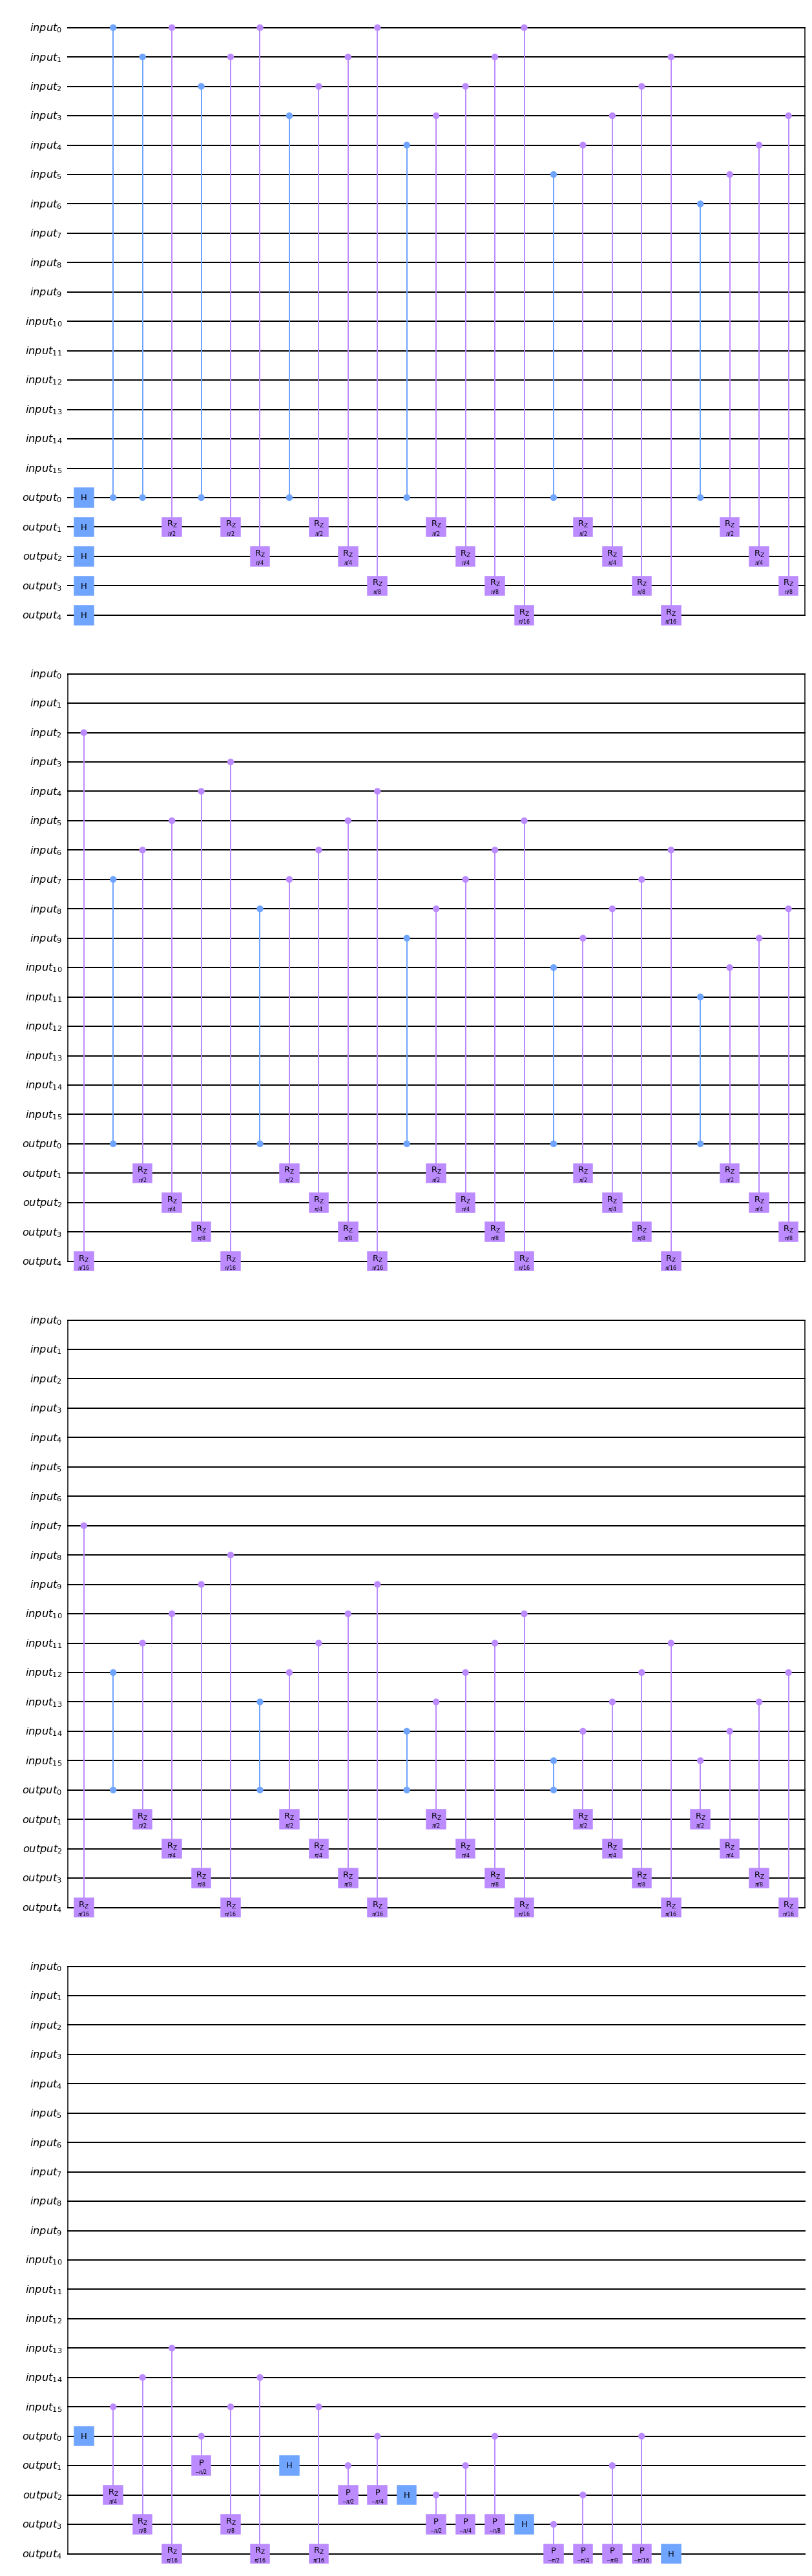

104


In [47]:
# Importing the qiskit module
from qiskit import *

# Defining input, output and scratch qubits
x16 = 16   # number of input qubits
y16 =  5 # number of output qubit 
s16 =  0 # number of scratch qubit

# Defining Quantum Circuit with the given circuits
def Circuit_16(In,Ou,Sc):
    if Sc != 0:
        # initiating required qubits
        X = QuantumRegister(In, 'input') 
        Y= QuantumRegister(Ou, 'output') 
        S = QuantumRegister(Sc, 'scratch')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(X,Y,S)
    else:
        
        # initiating required qubits
        X = QuantumRegister(In, 'input') 
        Y= QuantumRegister(Ou, 'output') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(X,Y)
    
    ##### Create you circuit below #########
    for i in range(5):
        Circ.h(Y[i])
    #Circ.barrier()
    
    for qubit in X:
        Circ.cz(qubit, Y[0])
    #Circ.barrier()
    
    for output in [1,2,3,4]:  
        for qubit in X:
            Circ.crz(pi/2**(output), qubit, Y[output])
        #Circ.barrier()
    
    #We can get rid of innecesary swaps applying crz's smartly before QFTdg
    #Circ.swap(Y[0], Y[3])
    #Circ.swap(Y[1], Y[2])
    
    Circ.h(Y[0])
    
    Circ.cp(-pi/2, Y[0], Y[1])
    Circ.h(Y[1])
    
    Circ.cp(-pi/2, Y[1], Y[2])
    Circ.cp(-pi/4, Y[0], Y[2])
    Circ.h(Y[2])
    
    Circ.cp(-pi/2, Y[2], Y[3])
    Circ.cp(-pi/4, Y[1], Y[3])
    Circ.cp(-pi/8, Y[0], Y[3])
    Circ.h(Y[3])
    
    Circ.cp(-pi/2, Y[3], Y[4])
    Circ.cp(-pi/4, Y[2], Y[4])
    Circ.cp(-pi/8, Y[1], Y[4])
    Circ.cp(-pi/16, Y[0], Y[4])
    Circ.h(Y[4])    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    #display(Circ.draw('mpl'))
    print(Circ.depth())
    
    return Circ

qc_2b = Circuit_16(x16,y16,s16)

### Grader 

In [40]:
from qc_grader import grade_ex2b

grade_ex2b(qc_2b)

Grading your answer for ex2/partB. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 217.
Feel free to submit your answer.



# Circuit verification and Cost Metric

$\textbf{Costing metric:}$ Circuit implementation cost is computed as follows, 
$$\text{Cost} = G+D+\frac{nS}{2},$$ 
where $G$ is the number of $\text{CNOT}$ gates used (note how the single-qubit gates are "free", which takes into account their relatively small implementation cost), $D$ is the two-qubit circuit depth (defined as the maximum length of the shortest path from any starting qubit to any ending qubit in the circuit going left, up, or down along the lines in the circuit diagram and counting the number of two-qubit gates), and $S$ is the number of scratch qubits used.  The timeout for verification is set to $5$ minutes.  All implementations that time out or compute any of the popcount outputs incorrectly are assigned the score of ${+}\infty$; the implementation with the smallest value of $\text{Cost}$ wins.

### Submission for evaluation 

In [41]:
## Uncomment and run the following code to submit

from qc_grader import submit_ex2a, submit_ex2b

#submit_ex2a(qc_2a)  #To submit exercise 2a

submit_ex2b(qc_2b)  #To submit exercise 2b

Submitting your answer for ex2/partB. Please wait...
Success 🎉! Your answer has been submitted.
